This notebook explores the centrality measures of the graph nodes.

---
Author: Jordi Grau Escolano


# 1. Load data

In [2]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt    # type: ignore
import sys
import math
import numpy as np  # type: ignore
from pathlib import Path
import geopandas as gpd  # type: ignore
from shapely import wkt  # type: ignore

project_root = Path().resolve().parents[0]
sys.path.insert(0, str(project_root))
print(project_root)

from paths import *

# 1. Load data
file = f'../{PR_NODES}/all_nodes_centrality.csv'
df = pd.read_csv(file)
df.rename(columns={'Node': 'node_id'}, inplace=True)

# Merge geometry to df and convert to geodataframe
file = f'../{PR_NODES}/normalized_node_attributes.csv'
geometry = pd.read_csv(file)[['node_id', 'geometry']]
geometry['geometry'] = geometry['geometry'].apply(wkt.loads)
df = df.merge(geometry, on='node_id', how='left')
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs=25831)
gdf.set_index('node_id', inplace=True)
gdf.head(2)

/home


,Unnamed: 0,Closeness,Betweenness,Degree,Percolations,Eccentricity,geometry
node_id,,,,,,,
21638831,0,0.000135,0.000107,0.000107,0.000107,16020.996603,POINT (431665.633 4579427.183)
1259351831,1,0.000139,0.000320,0.000160,0.000320,15815.487344,POINT (431577.21 4579241.901)


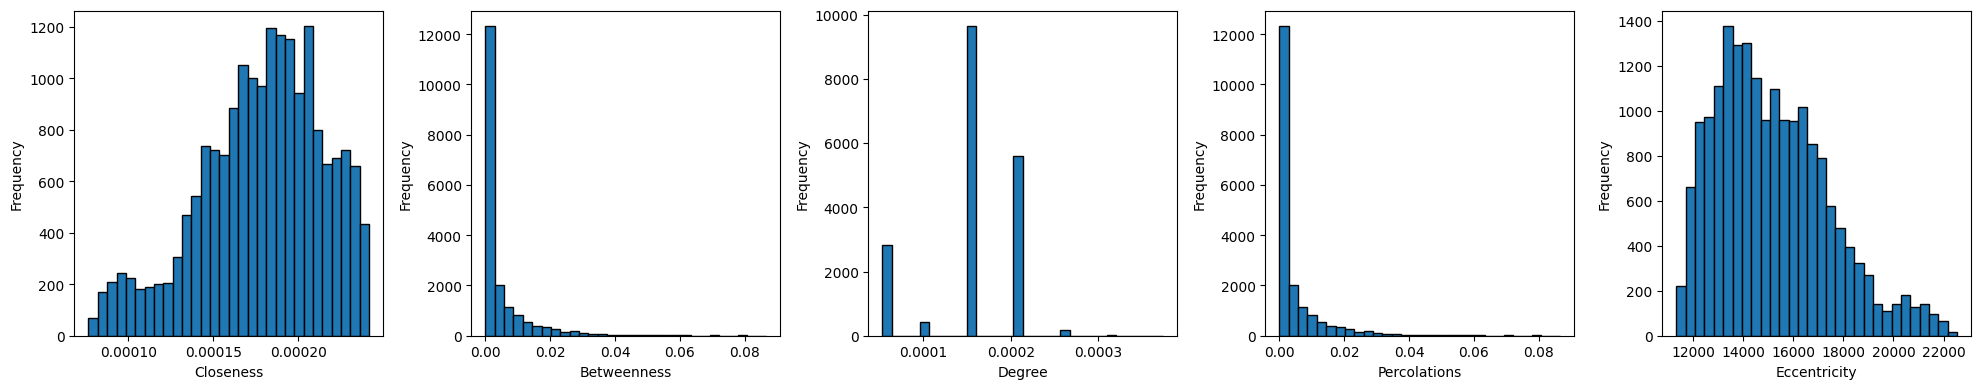

In [11]:
# Plot centrality scores distributions

cols = gdf.columns[1:-1]
fig, ax = plt.subplots(1, len(cols), figsize=(len(cols)*4, 4), sharey=False)
for i, col in enumerate(cols):
    ax[i].hist(df[col], bins=30, edgecolor='black')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

0 Closeness
1 log_Betweenness
2 Degree
3 log_Percolations
4 Eccentricity


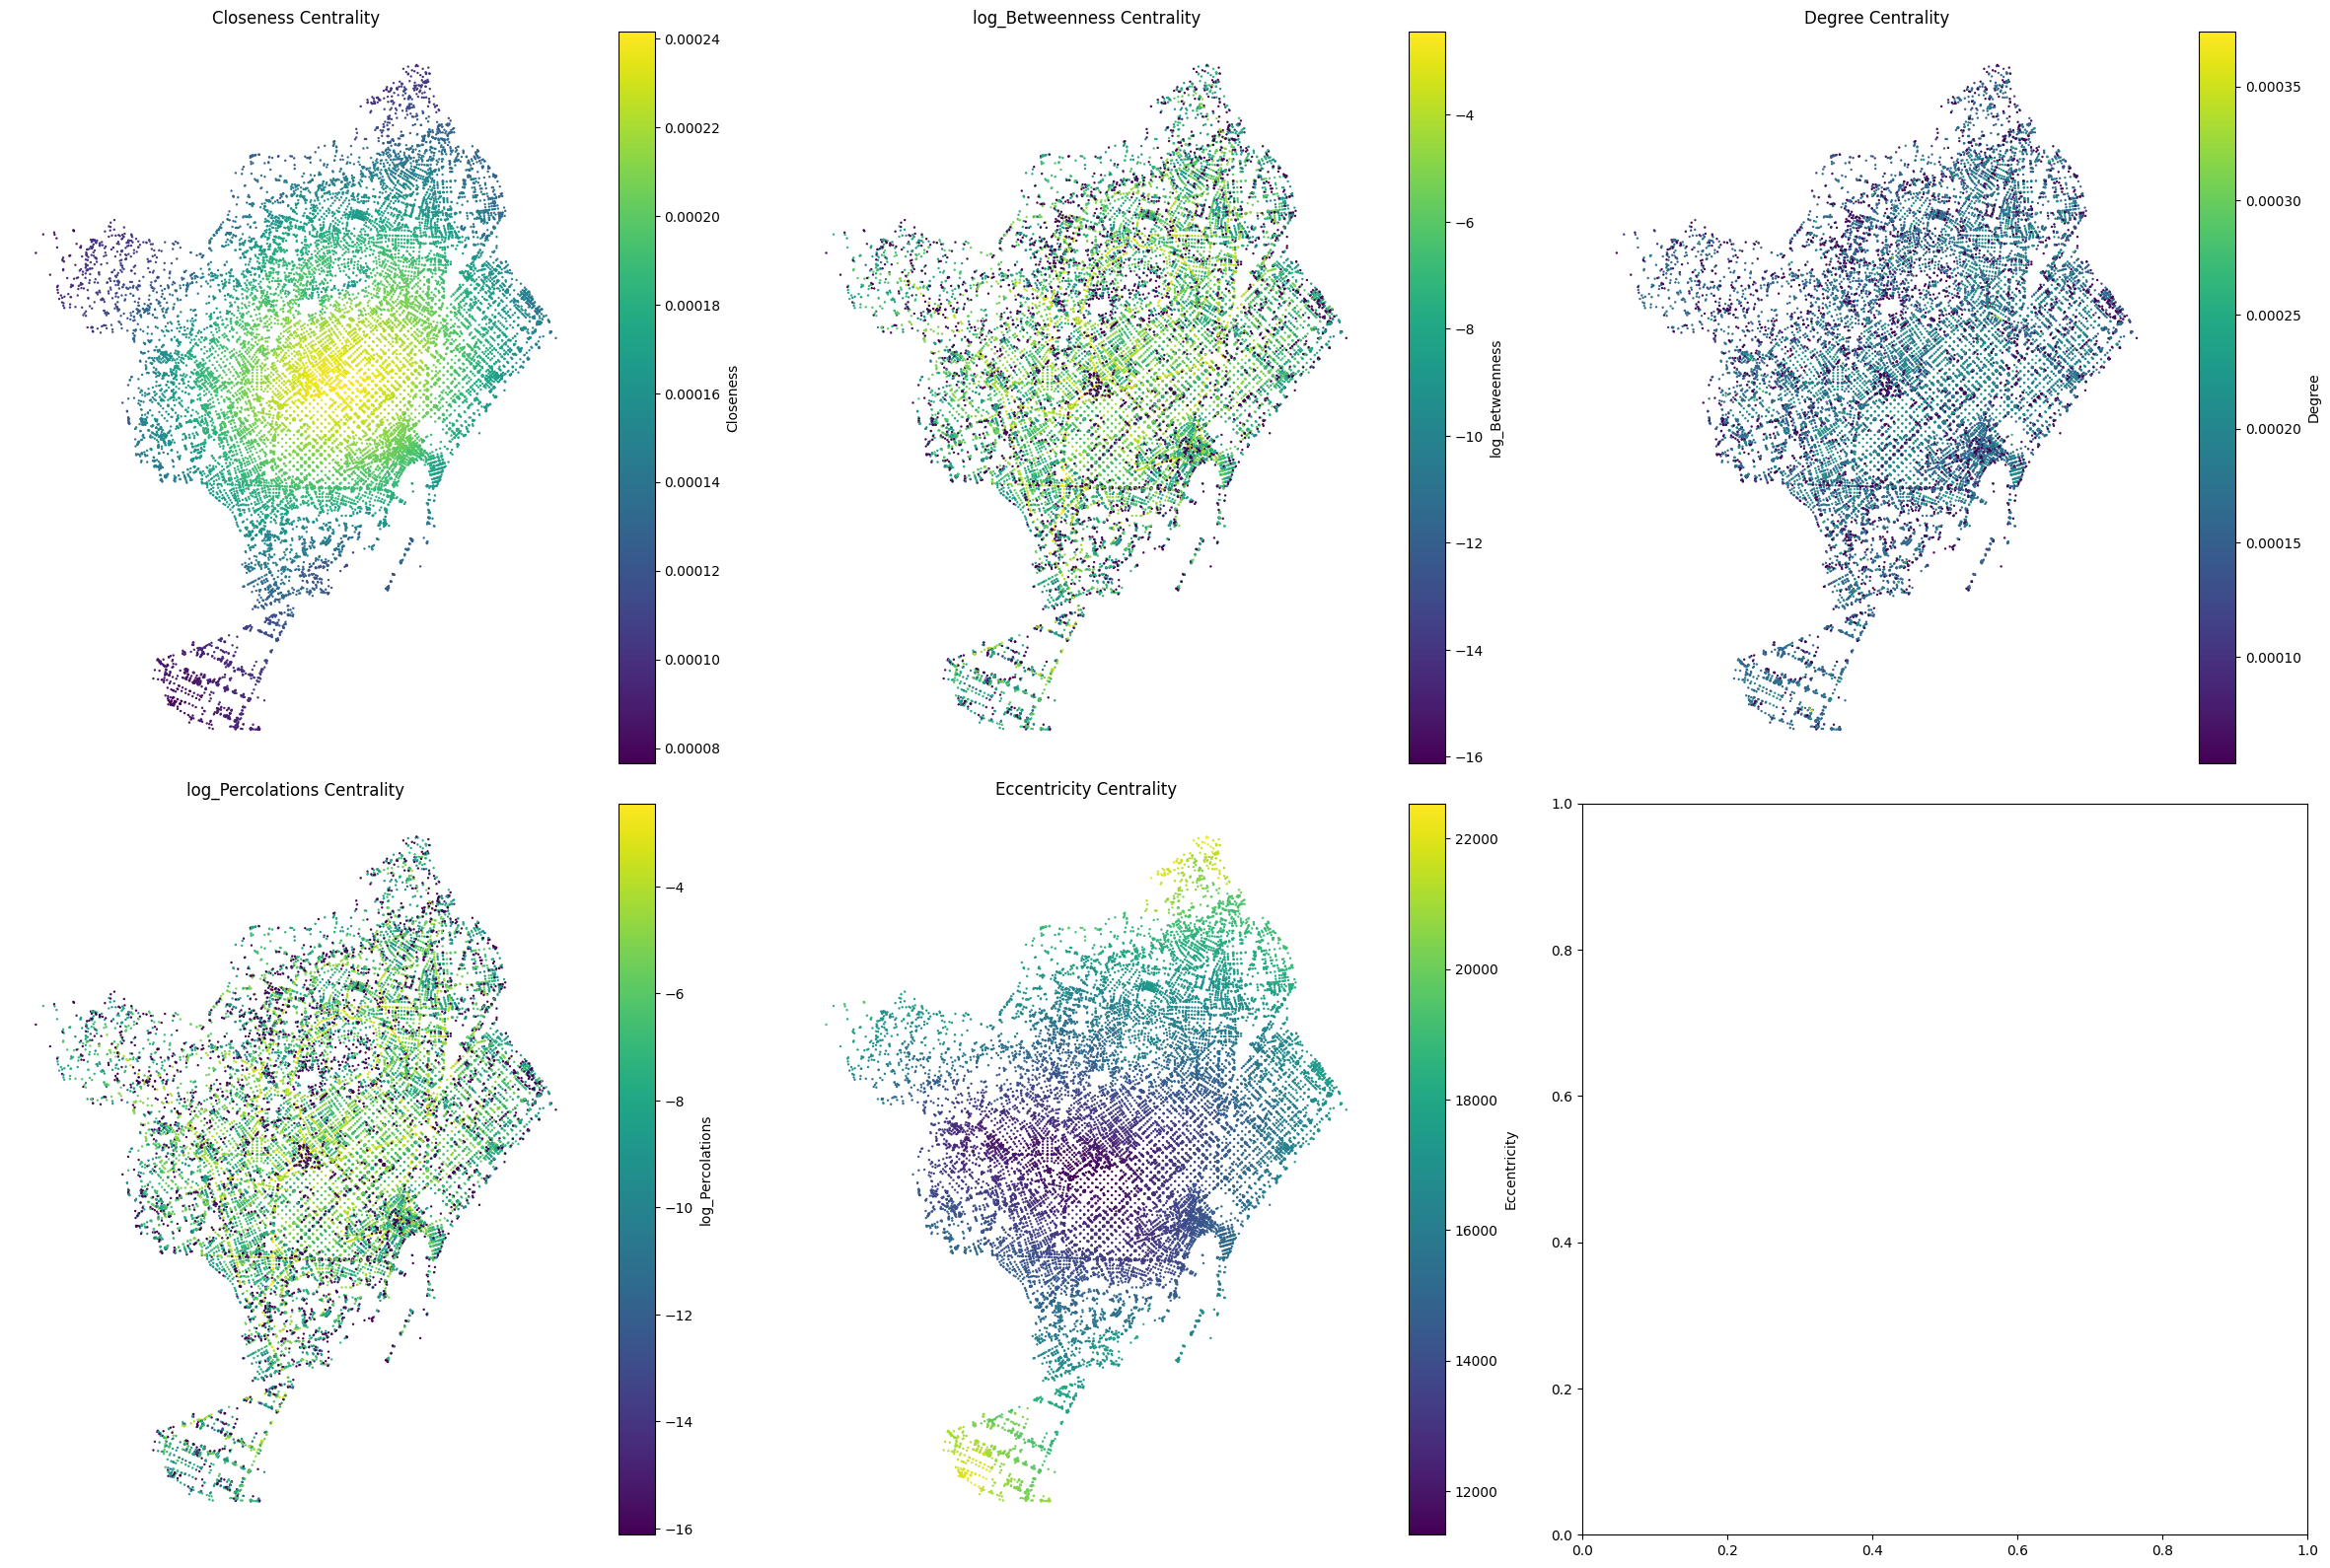

In [12]:
# Plot centrality scores across the graph
number_of_subplots = len(cols)

num_cols = 3
num_rows = math.ceil(number_of_subplots / num_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*8, num_rows*8))
axs = axs.flatten()
for i, col in enumerate(cols):
    
    # Plot logarithmically if betweenness or percolations
    if (col == 'Percolations') or (col == 'Betweenness'):
        gdf[f'log_{col}'] = np.log(gdf[col].values + 1e-07)
        col = f'log_{col}'
    
    print(i, col)
    scatter = gdf.plot(column=col, cmap='viridis', ax=axs[i], markersize=0.5)
    cbar = plt.colorbar(scatter.collections[0], ax=axs[i])
    
    if (col == 'Percolations') or (col == 'Betweenness'):
        cbar.set_label(f"Log ({col})")
    else:
        cbar.set_label(col)

    axs[i].set_title(f'{col} Centrality')  
    axs[i].axis('off')

plt.tight_layout()
plt.show()